In [2]:
from neural_implementation import neural_classification as nc
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('../datasets/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 150
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [5]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

df_short = df[df['variety'] != 'Setosa']
print(df_short)

     sepal.length  sepal.width  petal.length  petal.width     variety
50            7.0          3.2           4.7          1.4  Versicolor
51            6.4          3.2           4.5          1.5  Versicolor
52            6.9          3.1           4.9          1.5  Versicolor
53            5.5          2.3           4.0          1.3  Versicolor
54            6.5          2.8           4.6          1.5  Versicolor
55            5.7          2.8           4.5          1.3  Versicolor
56            6.3          3.3           4.7          1.6  Versicolor
57            4.9          2.4           3.3          1.0  Versicolor
58            6.6          2.9           4.6          1.3  Versicolor
59            5.2          2.7           3.9          1.4  Versicolor
60            5.0          2.0           3.5          1.0  Versicolor
61            5.9          3.0           4.2          1.5  Versicolor
62            6.0          2.2           4.0          1.0  Versicolor
63            6.1   

In [6]:
N = df_short.shape[0]
print(f'Velicina skupa podataka: {N}')

X = np.ones((N, m + 1))
X[:, 1] = df_short[attr1]
X[:, 2] = df_short[attr2]

y = df_short['variety']

Velicina skupa podataka: 100


In [7]:
classes = df_short['variety'].unique()
n_classes = len(classes)

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Mapiranje imena klasa u numericke vrednosti:
Versicolor -> 0
Virginica -> 1

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Versicolor
1 -> Virginica


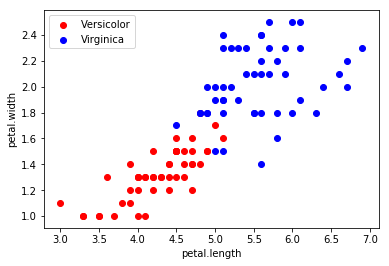

In [8]:
colors = ['red', 'blue']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [9]:
y = y.replace(name_to_class_dict)
y = np.array(y).reshape(-1, 1)

In [10]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.  4.7 1.4]
 [1.  4.5 1.5]
 [1.  4.9 1.5]
 [1.  4.  1.3]
 [1.  4.6 1.5]
 [1.  4.5 1.3]
 [1.  4.7 1.6]
 [1.  3.3 1. ]
 [1.  4.6 1.3]
 [1.  3.9 1.4]]
 ...
Ciljne promenljive:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
 ...


In [11]:
# nn = NeuralNetwork(m, [3, 4], 1)
nn = nc.NeuralNetwork(m, [3*m, 3*m], 1)
nn.print_network()
print()

nn.print_layer_mapper_sizes()
print()

nn.print_model()

~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1. 1. 1.]
Layer 4:
[1.]

Dimenzije matrica modela koji mapiraju slojeve:
0 -> 1: 6 x 3
1 -> 2: 6 x 7
2 -> 3: 1 x 7

Model:
W_0: 0 -> 1
[[-0.80400779 -0.16178152 -0.99827622]
 [-0.75561841  0.22865752 -0.52541747]
 [-0.45930228 -0.94739559 -0.02909608]
 [ 0.92300549  0.50687637  0.91656362]
 [ 0.50150781  0.76132288  0.45765316]
 [-0.21183461  0.14188734 -0.34089319]]
W_1: 1 -> 2
[[-0.63294823  0.64796208 -0.49619134 -0.36650078  0.43953161  0.04100015
   0.56509581]
 [-0.14743696  0.84215639 -0.54714366 -0.12559184 -0.48126353 -0.45415786
   0.4504937 ]
 [-0.71902177 -0.69461441 -0.95546167  0.98608936 -0.93569502  0.67341377
   0.33031102]
 [-0.538545    0.34713038 -0.53801604 -0.88546801 -0.5524162   0.40793933
  -0.18488646]
 [ 0.24942929 -0.90914638  0.52064652 -0.63710564 -0.91668317  0.34565597
   0.92285246]
 [-0.23856095 -0.18205664  0.48683612 -0.71158164  0.04976015  0.71853
   0.6563

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=7)

In [13]:
print(f'X_train:')
print(X_train)
print()

print(f'y_train:')
print(y_train)
print()

print(f'X_test:')
print(X_test)
print()

print(f'y_test:')
print(y_test)

X_train:
[[1.  6.1 2.5]
 [1.  3.9 1.4]
 [1.  5.  1.5]
 [1.  4.7 1.6]
 [1.  5.2 2. ]
 [1.  4.5 1.6]
 [1.  4.8 1.8]
 [1.  3.7 1. ]
 [1.  5.3 2.3]
 [1.  3.5 1. ]
 [1.  4.6 1.4]
 [1.  5.3 1.9]
 [1.  3.5 1. ]
 [1.  4.4 1.2]
 [1.  5.6 2.4]
 [1.  3.3 1. ]
 [1.  4.3 1.3]
 [1.  3.9 1.2]
 [1.  5.5 1.8]
 [1.  4.  1.2]
 [1.  6.7 2. ]
 [1.  4.8 1.8]
 [1.  4.2 1.3]
 [1.  5.1 1.6]
 [1.  4.  1.3]
 [1.  4.9 1.8]
 [1.  4.4 1.3]
 [1.  4.2 1.5]
 [1.  3.3 1. ]
 [1.  6.9 2.3]
 [1.  4.1 1. ]
 [1.  5.9 2.1]
 [1.  4.5 1.5]
 [1.  4.9 1.5]
 [1.  4.5 1.3]
 [1.  6.1 1.9]
 [1.  4.8 1.8]
 [1.  6.  1.8]
 [1.  5.4 2.1]
 [1.  6.6 2.1]
 [1.  5.7 2.1]
 [1.  5.1 2.4]
 [1.  5.8 1.8]
 [1.  6.7 2.2]
 [1.  5.6 1.4]
 [1.  4.7 1.4]
 [1.  4.5 1.5]
 [1.  4.1 1.3]
 [1.  5.  1.7]
 [1.  5.1 1.9]
 [1.  5.7 2.3]
 [1.  5.7 2.5]
 [1.  5.  2. ]
 [1.  4.1 1.3]
 [1.  3.8 1.1]
 [1.  6.4 2. ]
 [1.  5.2 2.3]
 [1.  4.7 1.5]
 [1.  4.4 1.4]
 [1.  4.3 1.3]
 [1.  5.4 2.3]
 [1.  4.9 1.5]
 [1.  4.2 1.3]
 [1.  5.5 2.1]
 [1.  5.8 1.6]
 [1.  5.6 1.8]
 

In [14]:
print('Testiranje backrpopagation algoritma:\n')
loss, gradient = nn.backward_propagation(X_train[0].reshape(1, -1), y_train[0].reshape(1, -1))
grad_approx = nc.gradient_checking(X_train[0].reshape(1, -1), y_train[0].reshape(1, -1), nn.model)

diff = abs(gradient - grad_approx)
print('|gradient - grad_approx|:')
print(diff)

Testiranje backrpopagation algoritma:

|gradient - grad_approx|:
[8.97700119e-04 5.47604071e-03 2.24425446e-03 1.25742337e-02
 7.67028993e-02 3.14355887e-02 1.22829626e-04 7.49262330e-04
 3.07074161e-04 1.60566085e-04 9.79447311e-04 4.01414866e-04
 2.95140399e-04 1.80035881e-03 7.37851138e-04 3.49756721e-02
 2.13350883e-01 8.74391377e-02 2.53119760e-01 3.43370128e-03
 8.54337975e-02 4.58815514e-04 2.52658743e-01 2.52651017e-01
 1.14036461e-01 1.71569758e-01 2.32743301e-03 5.79087767e-02
 3.10994547e-04 1.71257271e-01 1.71252035e-01 7.72962475e-02
 5.68299016e-02 7.70927171e-04 1.91814111e-02 1.03012265e-04
 5.67263951e-02 5.67246605e-02 2.56032192e-02 9.35861168e-03
 1.26954414e-04 3.15874826e-03 7.60585754e-01 3.59923822e-01
 1.87583722e-01 1.77016524e-01 1.60661163e-01 4.28275957e-01
 5.36081216e-01 9.47887827e-05 5.21979058e-02 5.21963097e-02
 2.35593097e-02 1.56009141e-02 2.11634485e-04 5.26567006e-03
 2.82788679e-05 1.55724995e-02 1.55720234e-02 7.02858124e-03
 6.11519990e-01 2.96

In [15]:
lambdas = [0] + [0.01 * (1.5**i) for i in range(11)]
print('lamda parameters:')
print(lambdas)

lamda parameters:
[0, 0.01, 0.015, 0.0225, 0.03375, 0.050625, 0.0759375, 0.11390625, 0.170859375, 0.2562890625, 0.38443359375, 0.576650390625]


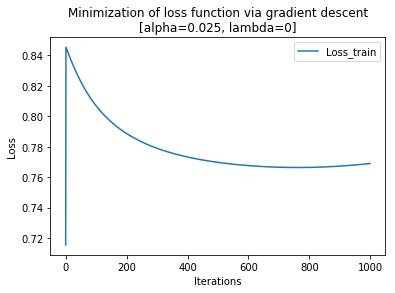

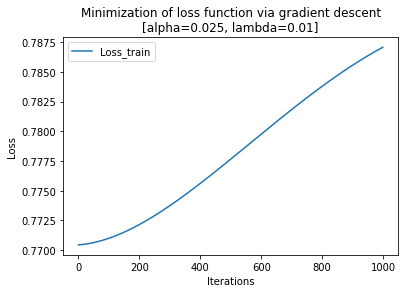

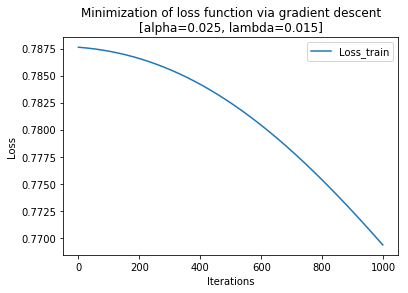

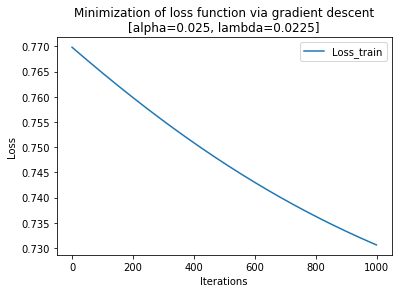

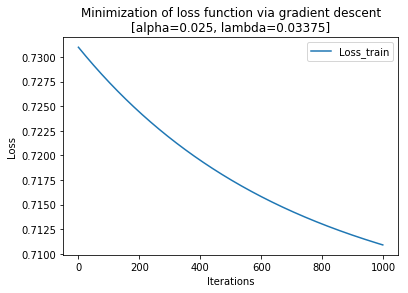

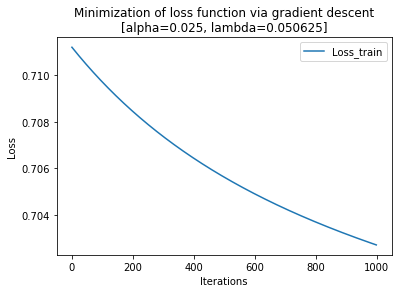

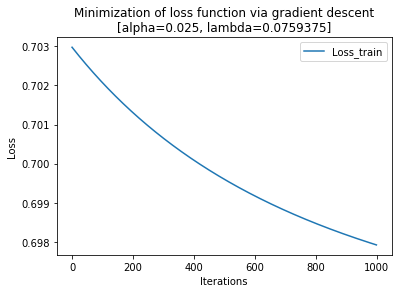

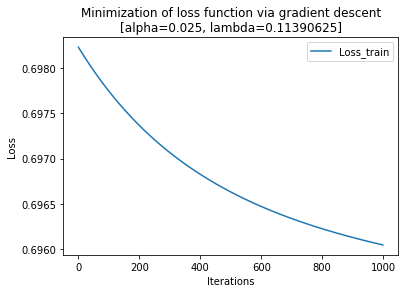

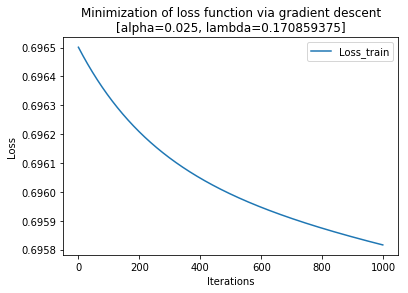

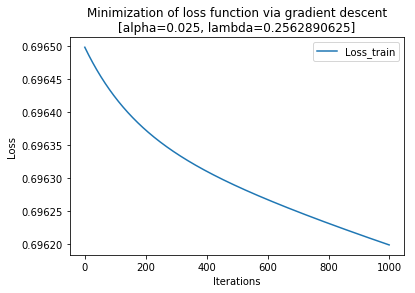

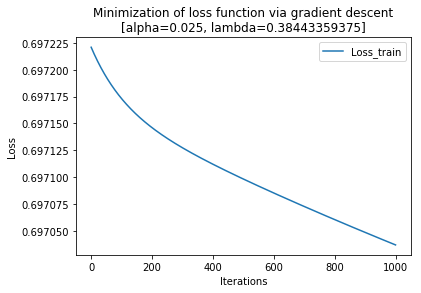

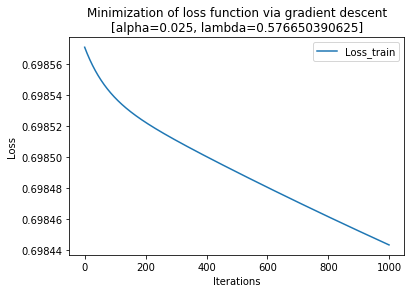

In [16]:
classifiers = [nn.fit(X_train, y_train, alpha=0.025, num_iter=1000, 
                      lambda_param=lambda_param, plot=True) for lambda_param in lambdas]

In [17]:
losses_test = [clf.loss(X_test, y_test, lambda_param) for clf, lambda_param in zip(classifiers, lambdas)]
print('Funkcije gubitka za svaki klasifikator posebno na test skupu:')
print(losses_test)

Funkcije gubitka za svaki klasifikator posebno na test skupu:
[0.7914623264402588, 0.8138701070633116, 0.7935622698117587, 0.7481724104707062, 0.7234005089637395, 0.7119694842957647, 0.7048388139727033, 0.70202218762839, 0.7020734534407095, 0.703496807475617, 0.7061610474836355, 0.7104696647149477]


In [18]:
min_loss = float('inf')
best_clf = None
best_lambda = None

for i in range(len(losses_test)):
    if losses_test[i] < min_loss:
        min_loss = losses_test[i]
        best_clf = classifiers[i]
        best_lambda = lambdas[i]
        
print(f'Najmanji gubitak (na test skupu) za svaki klasifikator: {min_loss}\n')
print(f'Model najboljeg klasifikatora:')

best_clf.print_model()
print()

print(f'Regularizacioni parametar lambda za koji je naucen najbolji model: {best_lambda}')

Najmanji gubitak (na test skupu) za svaki klasifikator: 0.70202218762839

Model najboljeg klasifikatora:
Model:
W_0: 0 -> 1
[[-8.10077902e-01  1.25676194e-03  2.80802693e-04]
 [-6.19527220e-01  4.93077694e-03  2.00332398e-03]
 [-4.33784406e-01  2.91298236e-03  1.43352384e-03]
 [ 9.34554069e-01  4.76090252e-03  2.39670855e-03]
 [ 5.19287056e-01  4.99108081e-03  2.30776274e-03]
 [-2.93343744e-01  2.13552890e-03  8.55537731e-04]]
W_1: 1 -> 2
[[-1.84135545e+00 -3.69594473e-04 -1.55376717e-03 -9.52786235e-04
  -1.91839640e-03 -1.89914324e-03 -6.32096661e-04]
 [-3.40533084e-01 -7.75620706e-04 -2.26656875e-03 -1.55765799e-03
  -3.20009329e-03 -2.92479970e-03 -1.28257421e-03]
 [-1.06940393e+00 -6.16136540e-04 -1.01508060e-03 -2.35096372e-04
  -1.45085722e-03 -8.34047818e-04 -4.48576483e-04]
 [-2.01651356e+00 -1.09023064e-02 -1.58419469e-02 -1.52943423e-02
  -2.80293290e-02 -2.47644547e-02 -1.54743865e-02]
 [-1.09408884e+00 -3.74972843e-04 -4.26643709e-04 -3.34572988e-04
  -1.08571765e-03 -6.65

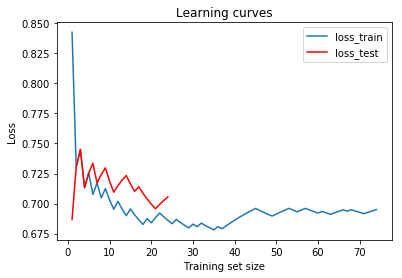

In [19]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, best_clf, best_lambda)

Ponovno iscrtavanje skupa podataka:


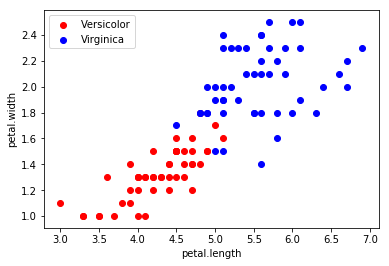

In [20]:
print('Ponovno iscrtavanje skupa podataka:')
colors = ['red', 'blue']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [29]:
petal_length = float(input('Unesite petal.length:'))
petal_width = float(input('Unesite petal.width:'))

x = np.array([1, petal_length, petal_width])
print(x)

[1.  3.5 2.4]


In [30]:
y_predict = best_clf.predict(x)
print(y_predict)

if y_predict < 0.5:
    print(class_to_name_dict[0])
else:
    print(class_to_name_dict[1])

0.46114392202041726
Versicolor


In [26]:
y_pred = nn.predict(x)
print(y_pred)

[0.47356416]
